In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# MAIN_PATH = '../input/'
df = pd.read_csv('bank_data.csv')
term_deposits = df.copy()
# Have a grasp of how our data looks.
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


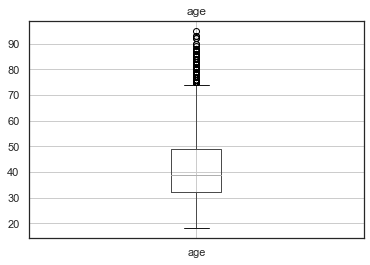

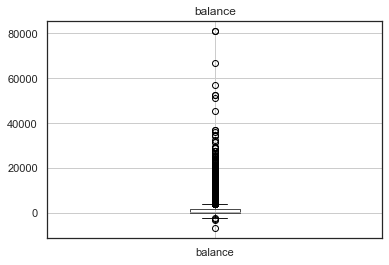

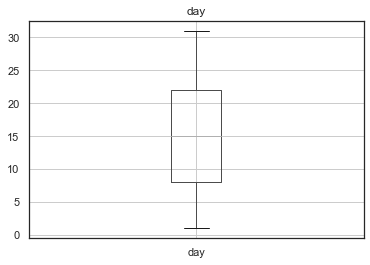

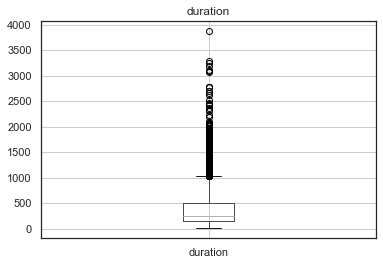

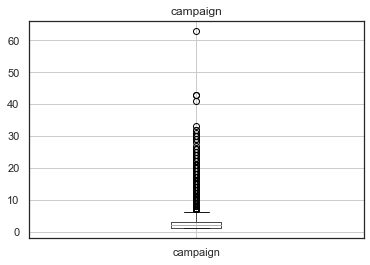

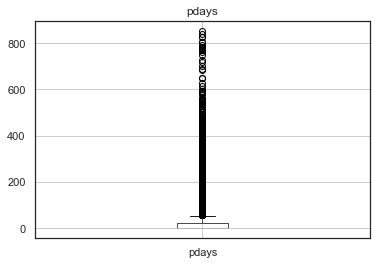

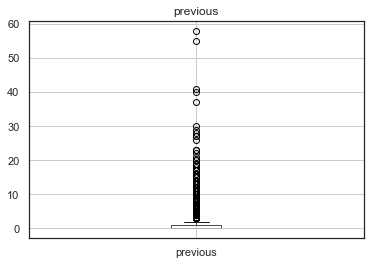

In [35]:
import matplotlib.pyplot as plt

# Select the numerical columns only
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Generate box plots for each numerical column
for col in numerical_cols:
    df[[col]].boxplot()
    plt.title(col)
    plt.show()


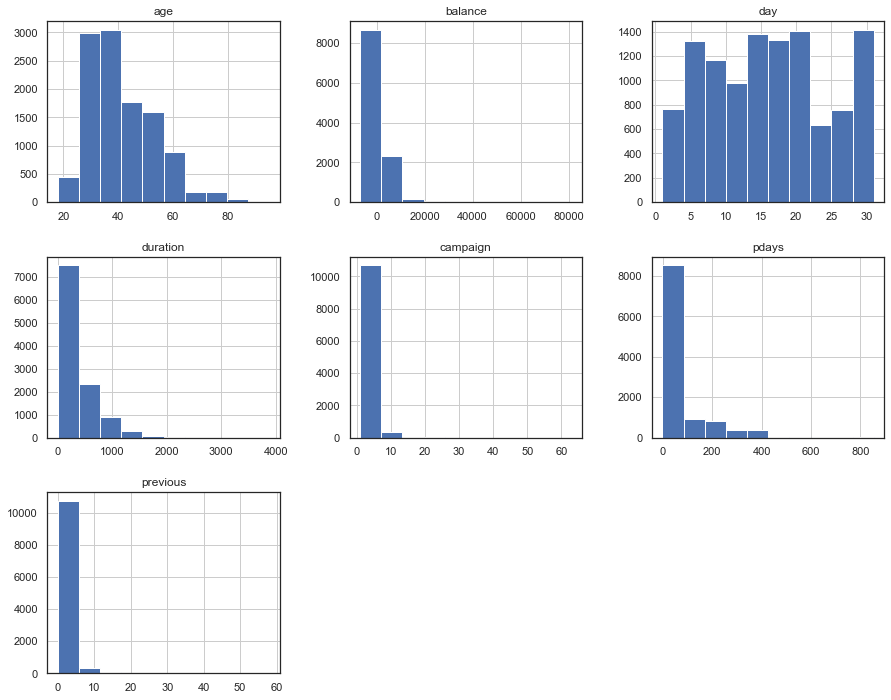

In [52]:
df.hist(figsize=(15,12))
plt.show()

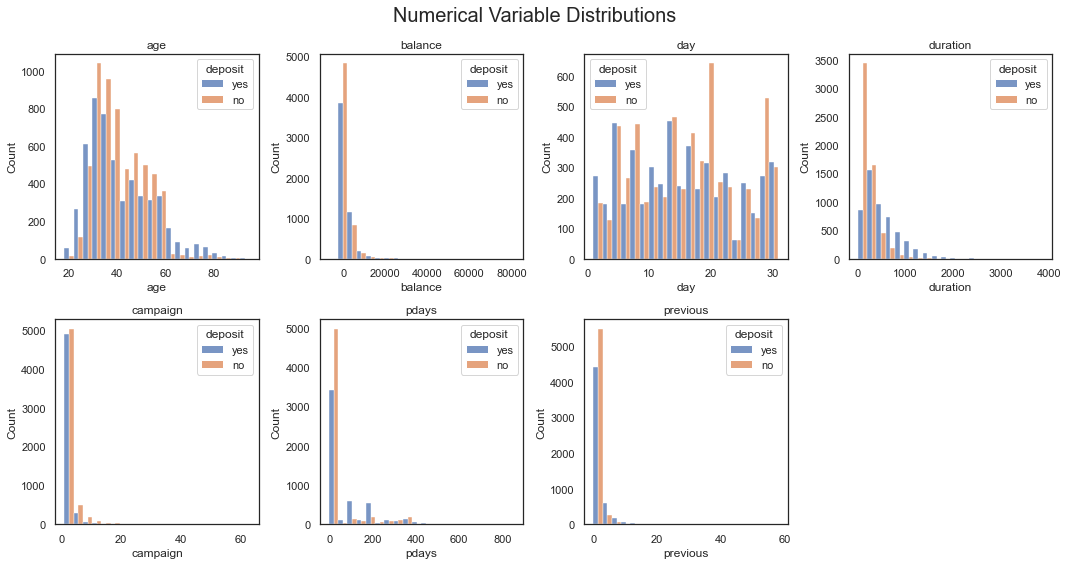

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of numerical columns
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Set the number of rows and columns in the grid
nrows = 2
ncols = 4

# Create a figure with the specified number of subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 8))

# Flatten the axs array to make it easier to loop through
axs = axs.flatten()

# Loop through each numerical column in the dataframe
for i, column in enumerate(num_cols):
    # Plot histogram for numerical variables
    sns.histplot(data=df, x=column, hue="deposit", multiple="dodge", ax=axs[i], bins=20)
    axs[i].set_title(column)

# Remove the empty plots
for i in range(len(num_cols), nrows*ncols):
    fig.delaxes(axs[i])

# Add a main title to the plot
fig.suptitle('Numerical Variable Distributions', fontsize=20)

# Add a tight layout to the plot
fig.tight_layout()

# Show the plot
plt.show()


C:\Users\chitv\AppData\Local\Temp\ipykernel_44360\3838104702.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


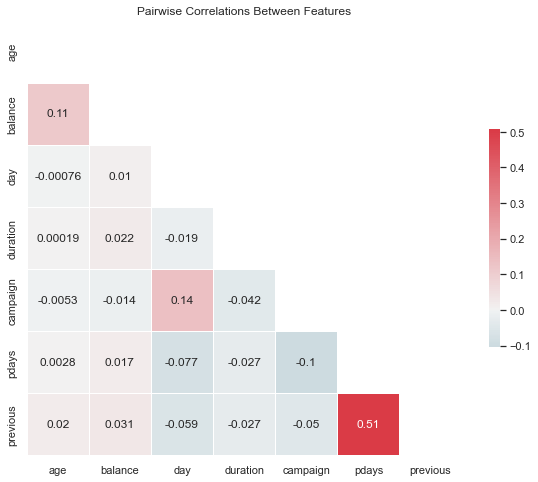

In [14]:
corr = df.corr()


sns.set(style="white")
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Pairwise Correlations Between Features")
plt.show()

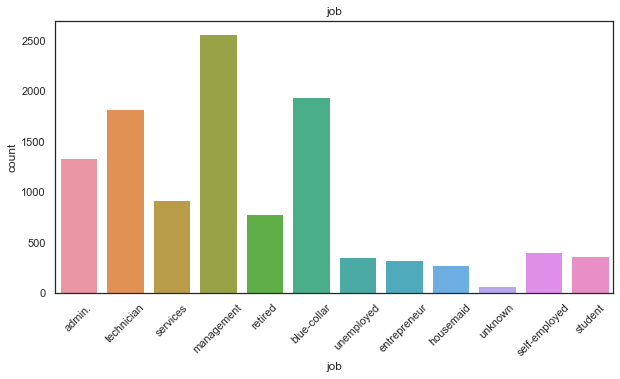

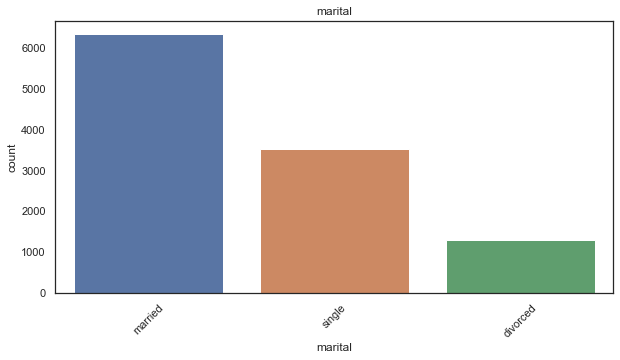

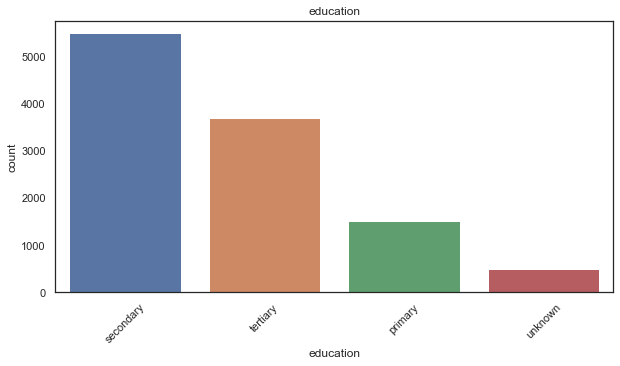

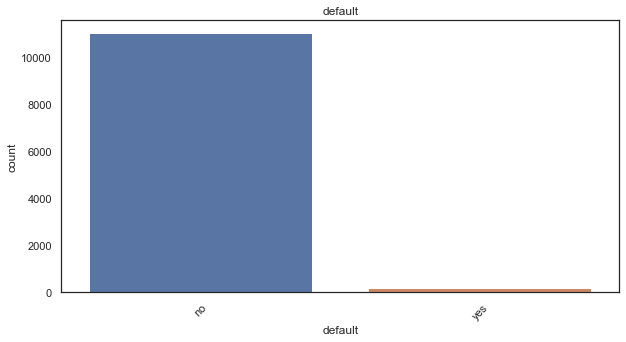

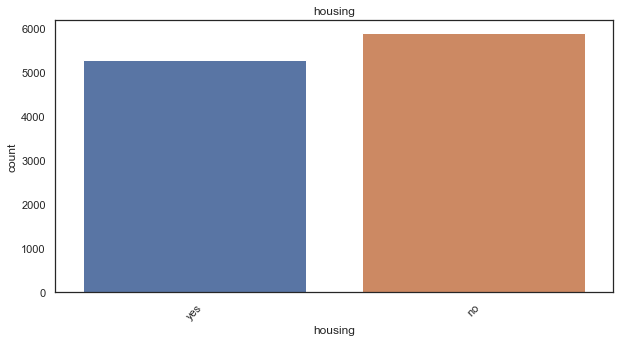

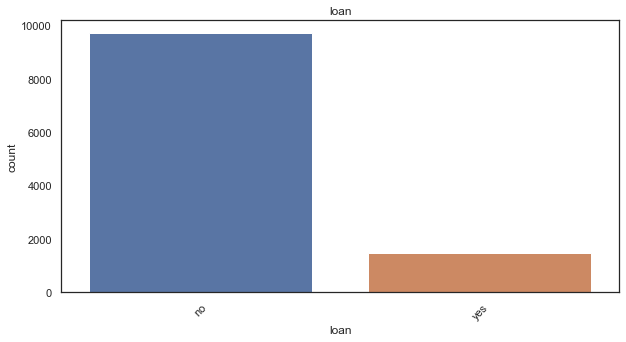

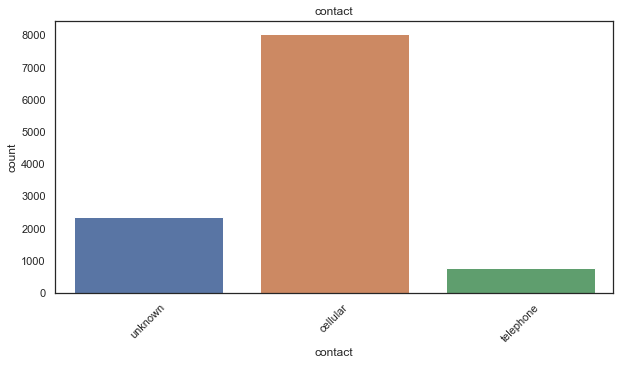

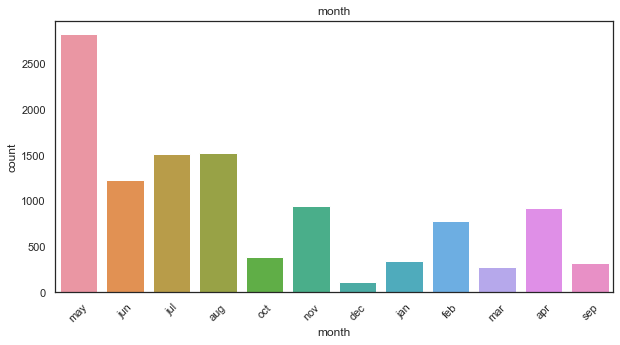

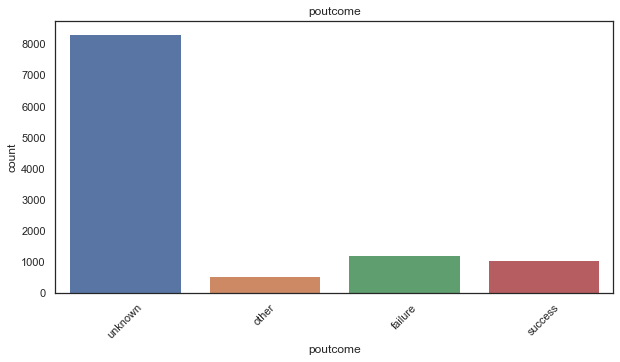

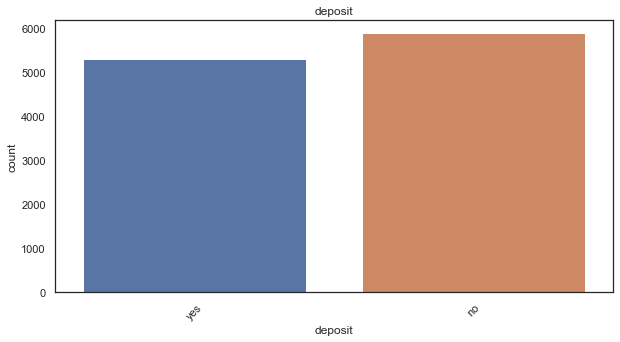

In [16]:
for column in df.columns:
    # Check if the variable is categorical or numerical
    if df[column].dtype == 'object':
        # Plot bar plot for categorical variables
        plt.figure(figsize=(10,5))
        sns.countplot(x=column, data=df)
        plt.xticks(rotation=45)
        plt.title(column)
        plt.show()

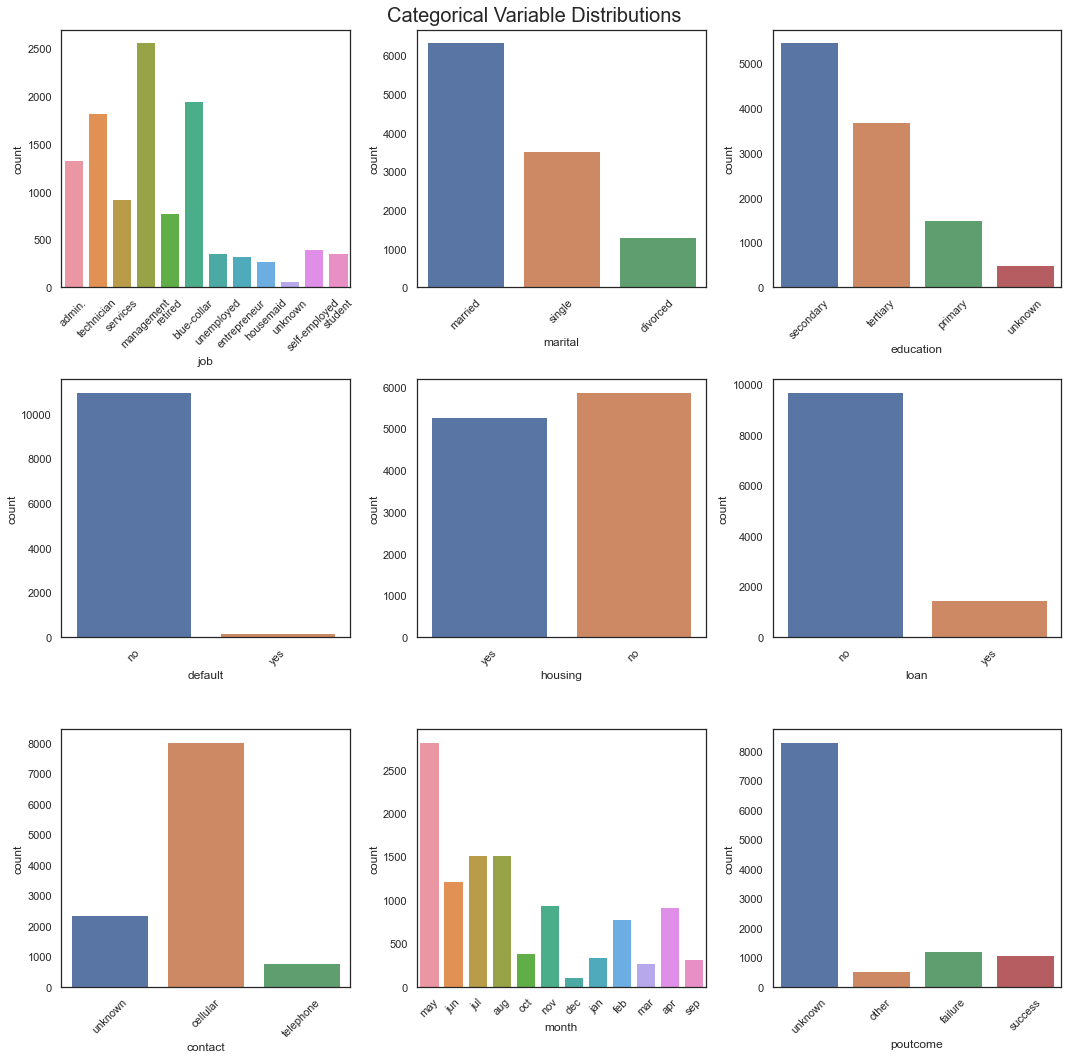

In [50]:


cat_cols = list(df.select_dtypes(include=['object']).columns)
# Set the number of rows and columns in the grid
nrows = 3
ncols = 3

# Create a figure with the specified number of subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

# Flatten the axs array to make it easier to loop through
axs = axs.flatten()


# Loop through each column in the dataframe
for i, column in enumerate(cat_cols):
    # Check if the variable is categorical or numerical
    if df[column].dtype == 'object' and i <9:
        # Plot bar plot for categorical variables
        sns.countplot(x=column, data=df, ax=axs[i])
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
#         axs[i].set_title(column)

        
# Remove the empty plots
# for i in range(num_cat_vars, nrows*ncols):
#     fig.delaxes(axs[i])
    
# Add a main title to the plot
fig.suptitle('Categorical Variable Distributions', fontsize=20)

# Add a tight layout to the plot
fig.tight_layout()

# Show the plot
plt.show()


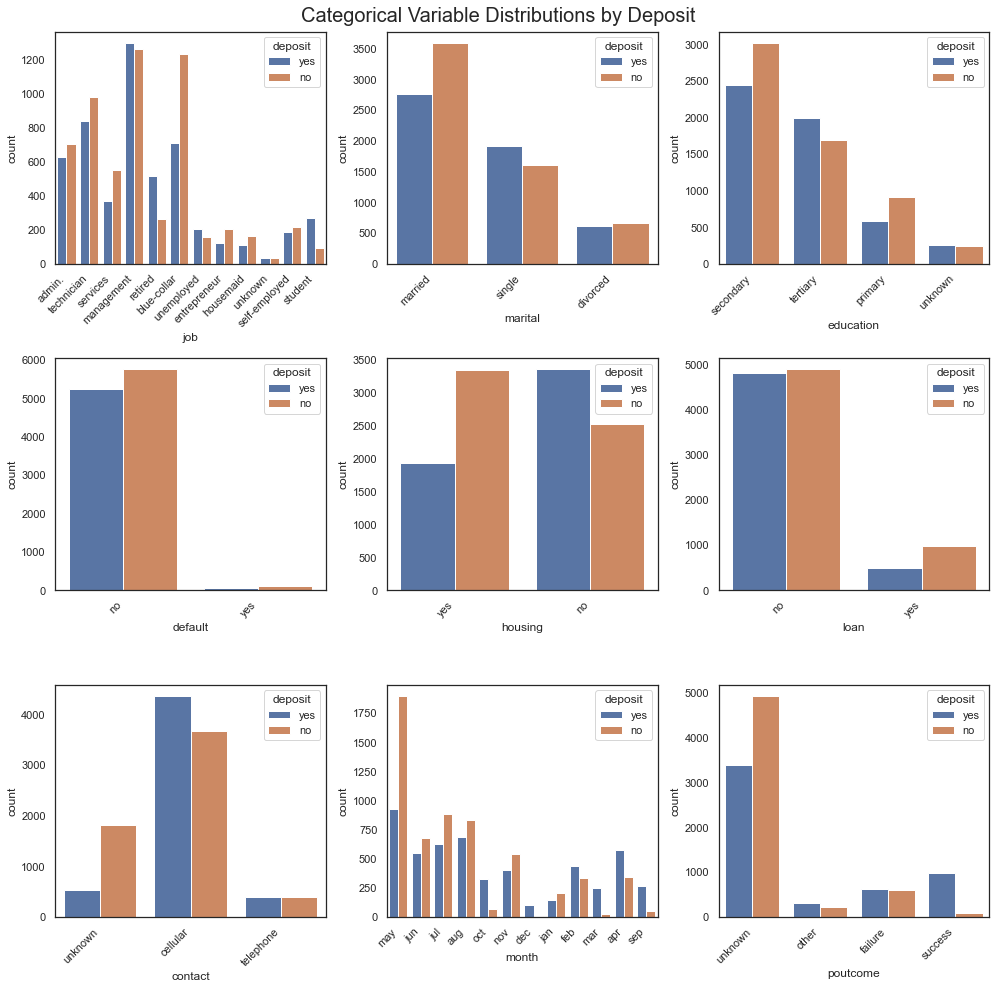

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of categorical columns
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Set the number of rows and columns in the grid
nrows = 3
ncols = 3

# Create a figure with the specified number of subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))

# Flatten the axs array to make it easier to loop through
axs = axs.flatten()

# Loop through each categorical column in the dataframe
for i, column in enumerate(cat_cols):
    # Plot bar plot for categorical variables
    sns.countplot(x=column, data=df, hue='deposit', ax=axs[i])
    axs[i].set_xticks(axs[i].get_xticks())
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')

# Remove the empty plots
for i in range(len(cat_cols), nrows*ncols):
    fig.delaxes(axs[i])

# Add a main title to the plot
fig.suptitle('Categorical Variable Distributions by Deposit', fontsize=20)

# Add a tight layout to the plot
fig.tight_layout()

# Show the plot
plt.show()


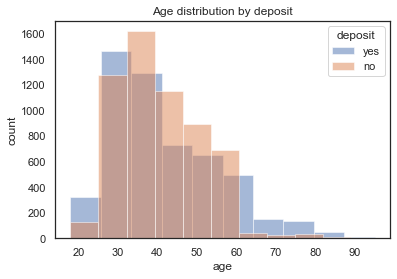

In [17]:
deposit_values = df['deposit'].unique()

for value in deposit_values:
    plt.hist(df[df['deposit']==value]['age'], alpha=0.5, label=value)

plt.legend(title='deposit')
plt.xlabel('age')
plt.ylabel('count')
plt.title('Age distribution by deposit')
plt.show()

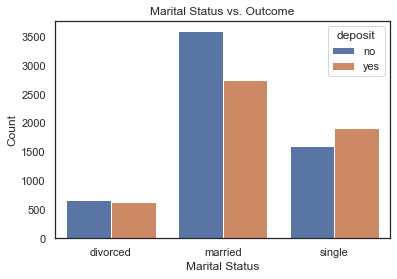

In [18]:
# Create a new dataframe with marital status and outcome variables
marital_outcome = df[['marital', 'deposit']].copy()

# Group the data by marital status and outcome, and count the values in each group
marital_outcome = marital_outcome.groupby(['marital', 'deposit']).size().reset_index(name='count')

# Create a bar chart showing the count of each marital status category for both the yes and no outcomes
sns.barplot(x='marital', y='count', hue='deposit', data=marital_outcome)
plt.title('Marital Status vs. Outcome')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

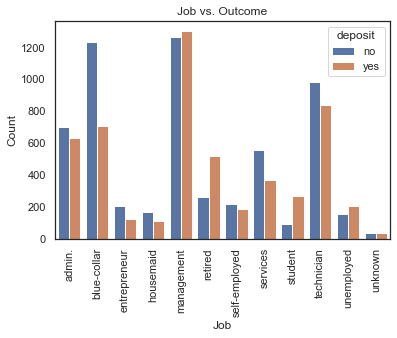

In [21]:
job_outcome = df[['job', 'deposit']].copy()

# Group the data by job and outcome, and count the values in each group
job_outcome = job_outcome.groupby(['job', 'deposit']).size().reset_index(name='count')

# Create a bar chart showing the count of each job category for both the yes and no outcomes
sns.barplot(x='job', y='count', hue='deposit', data=job_outcome)
plt.title('Job vs. Outcome')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=90) # rotate x-axis labels for better visibility
plt.show()


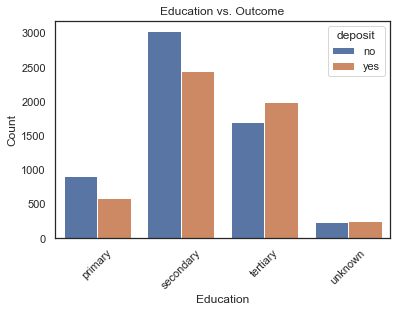

In [22]:
# Create a new dataframe with education and outcome variables
edu_outcome = df[['education', 'deposit']].copy()

# Group the data by education and outcome, and count the values in each group
edu_outcome = edu_outcome.groupby(['education', 'deposit']).size().reset_index(name='count')

# Create a bar chart showing the count of each education category for both the yes and no outcomes
sns.barplot(x='education', y='count', hue='deposit', data=edu_outcome)
plt.title('Education vs. Outcome')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [34]:
df['balance'].value_counts()

 0       774
 1        39
 3        35
 2        34
 4        29
        ... 
 5517      1
 8332      1
 4859      1
-267       1
-134       1
Name: balance, Length: 3805, dtype: int64

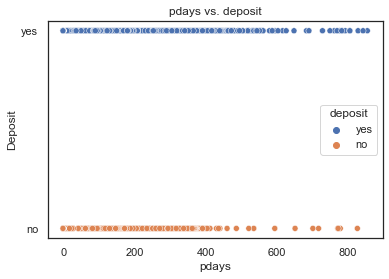

In [24]:
sns.scatterplot(data=df, x='pdays', y='deposit', hue='deposit')
plt.title('pdays vs. deposit')
plt.xlabel('pdays')
plt.ylabel('Deposit')
plt.show()

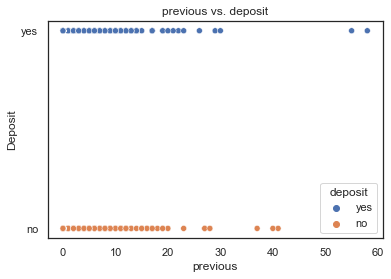

In [26]:
sns.scatterplot(data=df, x='previous', y='deposit', hue='deposit')
plt.title('previous vs. deposit')
plt.xlabel('previous')
plt.ylabel('Deposit')
plt.show()

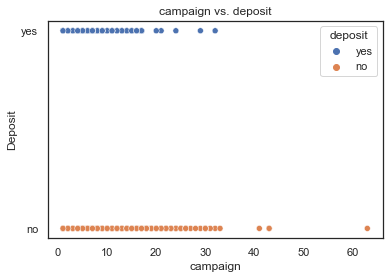

In [27]:
sns.scatterplot(data=df, x='campaign', y='deposit', hue='deposit')
plt.title('campaign vs. deposit')
plt.xlabel('campaign')
plt.ylabel('Deposit')
plt.show()

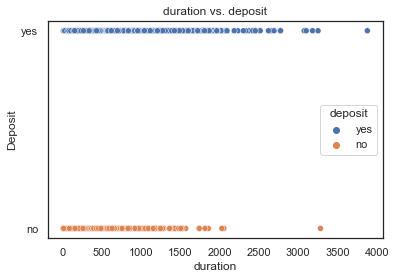

In [28]:
sns.scatterplot(data=df, x='duration', y='deposit', hue='deposit')
plt.title('duration vs. deposit')
plt.xlabel('duration')
plt.ylabel('Deposit')
plt.show()

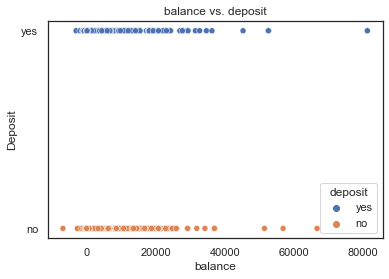

In [29]:
sns.scatterplot(data=df, x='balance', y='deposit', hue='deposit')
plt.title('balance vs. deposit')
plt.xlabel('balance')
plt.ylabel('Deposit')
plt.show()

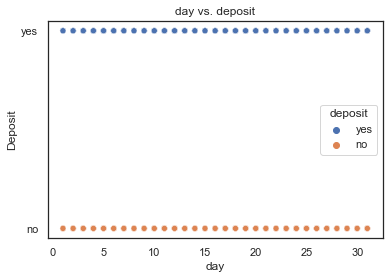

In [30]:
sns.scatterplot(data=df, x='day', y='deposit', hue='deposit')
plt.title('day vs. deposit')
plt.xlabel('day')
plt.ylabel('Deposit')
plt.show()